<a href="https://colab.research.google.com/github/Avnish3909/Trading_DT/blob/main/Trading_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import quandl as ql
df = ql.get("CHRIS/CME_ES2")
print(df.head())
print(df.tail())
df.shape

              Open    High     Low    Last  Change  Settle   Volume  \
Date                                                                  
1997-09-09  943.50  951.00  941.50  944.00     NaN  944.00    896.0   
1997-09-10  942.75  943.25  917.00  925.00     NaN  925.00  12261.0   
1997-09-11  924.00  929.75  910.25  918.25     NaN  918.25   9759.0   
1997-09-12  918.00  936.50  913.50  933.75     NaN  933.75  18496.0   
1997-09-15  933.50  939.75  929.00  931.50     NaN  931.50  11749.0   

            Previous Day Open Interest  
Date                                    
1997-09-09                       273.0  
1997-09-10                       382.0  
1997-09-11                      2909.0  
1997-09-12                      4059.0  
1997-09-15                      3818.0  
               Open     High      Low     Last  Change   Settle     Volume  \
Date                                                                         
2021-03-15  3937.50  3960.25  3913.00  3956.75   25.50  395

(5986, 8)

In [25]:
import QuantLib as qa
#from QuantLib import EMA, ATR, ADX, RSI, MACD
df["EMA10"]=qa.EMA(df["Settle"].values,timeperiod=10)
df["EMA30"]=qa.EMA(df["Settle"].valuues,timeperiod=30)
df["ATR"]=qa.ATR(df["High"].values,df["low"].values,df["Settle"].values,timeperiod=14)
df["ADX"]=qa.ADX(df["High"].values,df["low"].values,df["Settle"].values,timeperiod=14)
df["RSI"]=qa.RSI(df["Settle"].values,timeperiod=14)
macd, macdsignal, macdhist= qa.MACD(df["Settle"].values, fastperiod=12, slowperiod=26, signalperiod=9)
df["MACD"]=macd
df["MACDsignal"]=macdsignal
print(df.tail())

AttributeError: module 'QuantLib' has no attribute 'EMA'

In [33]:
import pandas as pd
import pandas_ta as ta

# Assuming you have OHLC data stored in a DataFrame 'df'

# Calculate EMA
df['EMA10'] = ta.ema(df['Settle'], length=10)
df['EMA30'] = ta.ema(df['Settle'], length=30)

# Calculate ATR
df['ATR'] = ta.atr(df['High'], df['Low'], df['Settle'], length=14)

# Calculate ADX
# Calculate ADX
df[['ADX_neg', 'ADX_pos', 'ADX']] = ta.adx(df['High'], df['Low'], df['Settle'], length=14)

# Separate the positive and negative directional movement indicators (optional)
df.drop(columns=['ADX_neg', 'ADX_pos'], inplace=True)

# Calculate RSI
df['RSI'] = ta.rsi(df['Settle'], length=14)

# Calculate MACD
macd, macdsignal, macdhist = ta.macd(df['Settle'])

# Assign each MACD component to a separate column
df['MACD'] = macd
df['MACD_signal'] = macdsignal
df['MACD_histogram'] = macdhist
# Print the DataFrame with calculated indicators
df.tail()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACD_signal,MACD_histogram
Date,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,19.248747,61.385366,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,18.657344,60.581439,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,19.629829,61.617057,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,20.640883,53.678224,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,22.376538,52.880689,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Last'].plot(kind='hist', bins=20, title='Last')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Last', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Last', y='Change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Previous Day Open Interest']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Previous Day Open Interest', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Previous Day Open Interest')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Previous Day Open Interest']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Previous Day Open Interest', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Previous Day Open Interest')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Previous Day Open Interest']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Previous Day Open Interest', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Previous Day Open Interest')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Previous Day Open Interest']
  ys = series['Last']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Previous Day Open Interest', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Previous Day Open Interest')
_ = plt.ylabel('Last')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Last'].plot(kind='line', figsize=(8, 4), title='Last')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=092544f0d22d416944281cbda02b8cfb13884abe598aca13e58211993d4364c8
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [35]:
import numpy as np
df["ClgtEMA10"]=np.where(df["Settle"]>df["EMA10"],1,-1)
df["EMA10gtEMA30"]=np.where(df["EMA10"]>df["EMA30"],1,-1)
df["MACDSIgtMACD"]=np.where(df["MACD_signal"]>df["MACD"],1,-1)
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACD_signal,MACD_histogram,ClgtEMA10,EMA10gtEMA30,MACDSIgtMACD
Date,,,,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,19.248747,61.385366,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,1,1,1
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,18.657344,60.581439,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,1,1,1
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,19.629829,61.617057,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,1,1,1
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,20.640883,53.678224,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,-1,1,1
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,22.376538,52.880689,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,-1,1,1


In [37]:
df["return"]=df["Settle"].pct_change(1).shift(-1)
df["target_cls"]=np.where(df["return"]>0,1,0)
df["target_rgs"]=df["return"]
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,...,RSI,MACD,MACD_signal,MACD_histogram,ClgtEMA10,EMA10gtEMA30,MACDSIgtMACD,return,target_cls,target_rgs
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,...,61.385366,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,1,1,1,-0.001453,0,-0.001453
2021-03-16,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,...,60.581439,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,1,1,1,0.002783,1,0.002783
2021-03-17,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,...,61.617057,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,1,1,1,-0.014507,0,-0.014507
2021-03-18,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,...,53.678224,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,-1,1,1,-0.001600,0,-0.001600
2021-03-19,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,...,52.880689,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,-1,1,1,NaN,0,NaN


In [39]:
predictors_list=["ATR","ADX","RSI","ClgtEMA10","EMA10gtEMA30","MACDSIgtMACD"]
X=df[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIgtMACD
Date,,,,,,
2021-03-15,67.948613,19.248747,61.385366,1,1,1
2021-03-16,65.095140,18.657344,60.581439,1,1,1
2021-03-17,63.909773,19.629829,61.617057,1,1,1
2021-03-18,64.916218,20.640883,53.678224,-1,1,1
2021-03-19,63.743631,22.376538,52.880689,-1,1,1


In [40]:
y_cls=df.target_cls
y_cls.tail()

Date
2021-03-15    0
2021-03-16    1
2021-03-17    0
2021-03-18    0
2021-03-19    0
Name: target_cls, dtype: int64

In [41]:
y_rgs=df.target_rgs
y_rgs.tail()

Date
2021-03-15   -0.001453
2021-03-16    0.002783
2021-03-17   -0.014507
2021-03-18   -0.001600
2021-03-19         NaN
Name: target_rgs, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train,X_cls_test,y_cls_train,y_cls_test=train_test_split(X,y,test_size=0.3,stratify=y)

print(X_cls_train.shape, y_cls_train.shape)
print(X_cls_test.shape, y_cls_test.shape)

(4190, 6) (4190,)
(1796, 6) (1796,)


In [51]:
X_cls_train.isnull().sum()
mean = X_cls_train.mean()
X_cls_train.fillna(mean, inplace=True)

In [52]:
y_cls_train.isnull().sum()
mean = y_cls_train.mean()
y_cls_train.fillna(mean, inplace=True)

In [57]:
X_cls_test.isnull().sum()
mean = X_cls_test.mean()
X_cls_test.fillna(mean, inplace=True)

In [58]:
y_cls_test.isnull().sum()
mean = y_cls_test.mean()
y_cls_test.fillna(mean, inplace=True)

In [43]:
train_lenght=int(len(df)*0.70)
X_rgs_train=X[:train_lenght]
X_rgs_test=X[train_lenght:]
y_rgs_train=y_rgs[:train_lenght]
y_rgs_test=y_rgs[train_lenght:]

print(X_rgs_train.shape, y_rgs_train.shape)
print(X_rgs_test.shape, y_rgs_test.shape)

(4190, 6) (4190,)
(1796, 6) (1796,)


In [67]:
X_rgs_train.isnull().sum()
mean = X_rgs_train.mean()
X_rgs_train.fillna(mean, inplace=True)

<ipython-input-67-c0ea57b5efd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_rgs_train.fillna(mean, inplace=True)


In [68]:
y_rgs_train.isnull().sum()
mean = y_rgs_train.mean()
y_rgs_train.fillna(mean, inplace=True)

In [70]:
X_rgs_test.isnull().sum()
mean = X_rgs_test.mean()
X_rgs_test.fillna(mean, inplace=True)

<ipython-input-70-11e546f3b6f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_rgs_test.fillna(mean, inplace=True)


In [71]:
y_rgs_test.isnull().sum()
mean = y_rgs_test.mean()
y_rgs_test.fillna(mean, inplace=True)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_leaf=6)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [53]:
clf=clf.fit(X_cls_train,y_cls_train)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

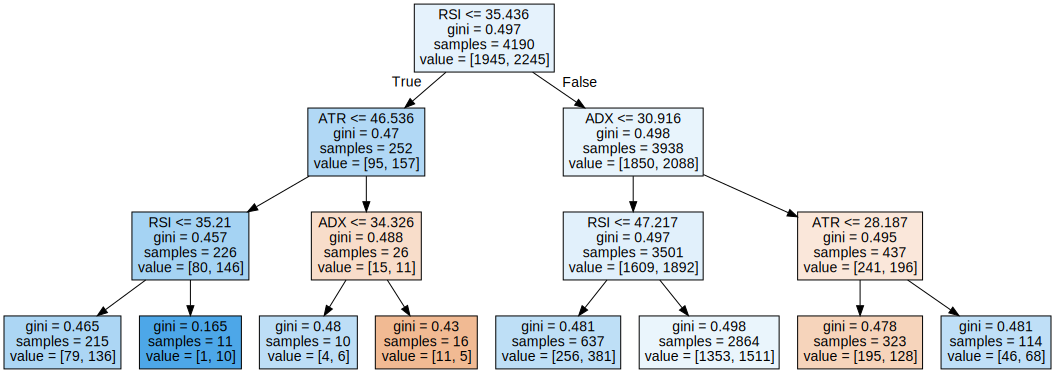

In [54]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)

In [59]:
y_cls_pred=clf.predict(X_cls_test)

In [61]:
print(y_cls_pred)

[1 1 1 ... 1 1 1]


In [64]:
from sklearn.metrics import classification_report
report=classification_report(y_cls_pred,y_cls_test)
print(report)

              precision    recall  f1-score   support

           0       0.09      0.50      0.15       146
           1       0.92      0.54      0.68      1650

    accuracy                           0.54      1796
   macro avg       0.51      0.52      0.41      1796
weighted avg       0.86      0.54      0.64      1796



In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=200)

In [69]:
dtr.fit(X_rgs_train,y_rgs_train)

DecisionTreeRegressor(min_samples_leaf=200)

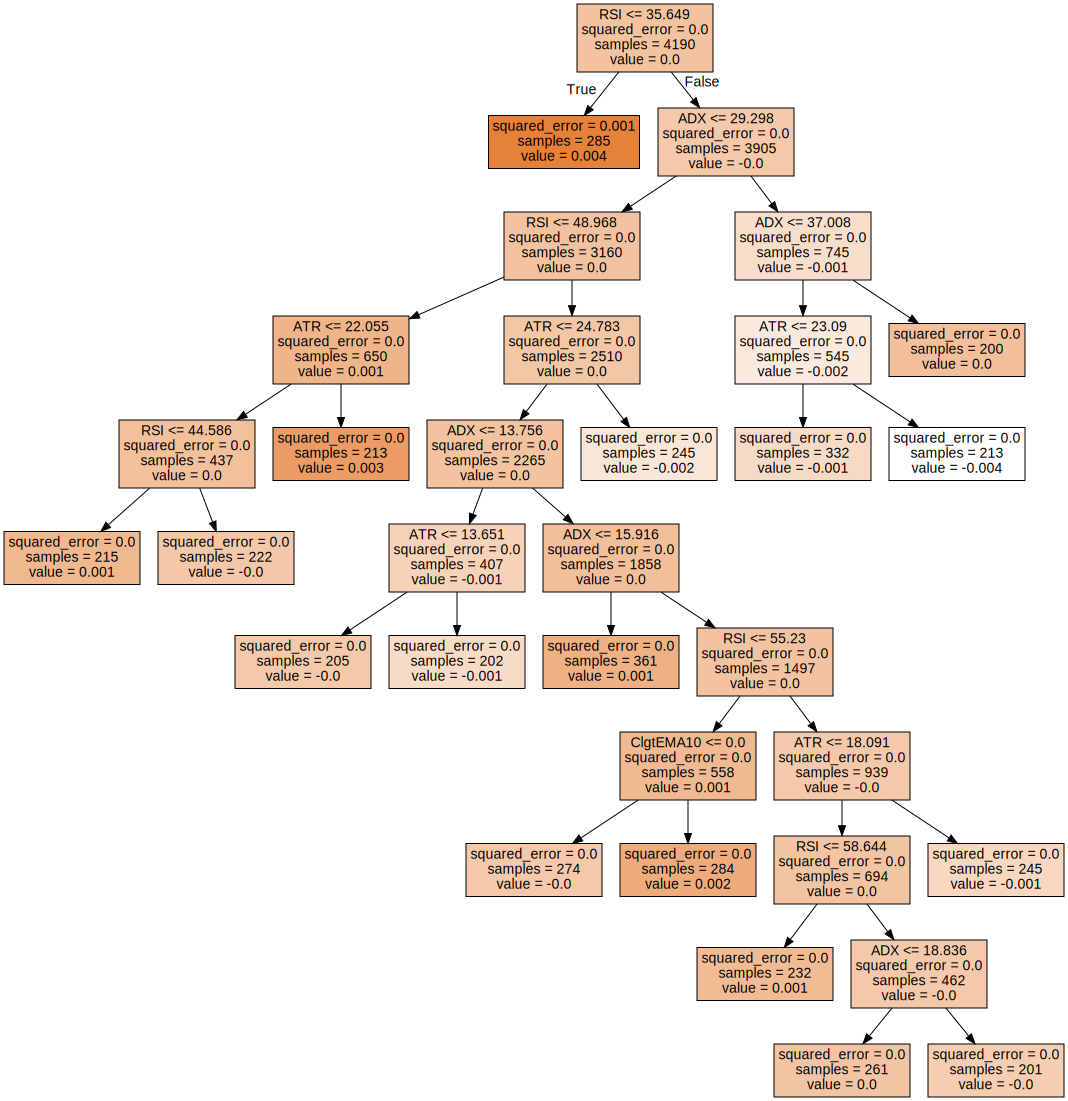

In [72]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(dtr,out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)